# Palmer Penguins

### Step 1: Splitting the dataset into 3 with defined class proportions (simulated imbalance)

In [7]:
import pandas
import numpy 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

In [8]:
# setting up plot style

import matplotlib.font_manager as fm

path_to_public_sans = fm.findfont('Public Sans')
public_sans = fm.FontProperties(fname=path_to_public_sans)

sns.set_style("whitegrid")
plt.rcParams['font.family'] = public_sans.get_name()  # Register the font by its internal name
plt.rcParams['font.size'] = 12

# set figure size to 14, 6 in rcparams
plt.rcParams['figure.figsize'] = 14, 6
plt.rcParams['figure.dpi'] = 600
plt.rcParams['figure.facecolor'] = '#f7f6f2'
plt.rcParams['axes.facecolor'] = '#f7f6f2'
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'grey'
plt.rcParams['grid.alpha'] = 0.55
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.2
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["#095859"])

# xtick text size
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

In [2]:
penguin_data = pandas.read_csv("../datasets/palmer-penguins/penguins_size.csv")
penguin_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
# make species, island and sex values lowercase
penguin_data["species"] = penguin_data["species"].str.lower()
penguin_data["island"] = penguin_data["island"].str.lower()
penguin_data['sex'] = penguin_data['sex'].str.lower()

penguin_data['sex'].value_counts()


sex
male      168
female    165
.           1
Name: count, dtype: int64

In [4]:
penguin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
# missing data
penguin_data.isnull().sum()

# NaN values in the dataset
penguin_data[penguin_data.isna().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,adelie,torgersen,NaN,NaN,NaN,NaN,NaN
8,adelie,torgersen,34.1,18.1,193.0,3475.0,NaN
9,adelie,torgersen,42.0,20.2,190.0,4250.0,NaN
10,adelie,torgersen,37.8,17.1,186.0,3300.0,NaN
11,adelie,torgersen,37.8,17.3,180.0,3700.0,NaN
47,adelie,dream,37.5,18.9,179.0,2975.0,NaN
246,gentoo,biscoe,44.5,14.3,216.0,4100.0,NaN
286,gentoo,biscoe,46.2,14.4,214.0,4650.0,NaN
324,gentoo,biscoe,47.3,13.8,216.0,4725.0,NaN
339,gentoo,biscoe,NaN,NaN,NaN,NaN,NaN


```py
# drop rows with missing values?
# penguins = penguins.dropna()

# Define a function to create imbalanced datasets
def create_imbalanced_dataset(df, class_col, proportions, random_state=42):
    # all unique values for species
    classes = df[class_col].unique()
    
    imbalanced_data = pd.DataFrame()
    for i, cls in enumerate(classes):
        class_samples = df[df[class_col] == cls]
        n_samples = int(proportions[i] * len(df))  # calc no. of samples required for class
        sampled_class = resample(
            class_samples, 
            replace=False,  # sample without replacement !important
            n_samples=n_samples, 
            random_state=random_state
        )
        imbalanced_data = pd.concat([imbalanced_data, sampled_class])
    
    return imbalanced_data

# Define the proportions for each imbalance level
extreme_imbalance = [0.85, 0.10, 0.05]
medium_imbalance = [0.65, 0.20, 0.15]
low_imbalance = [0.45, 0.30, 0.25]

# Create the datasets
extreme_dataset = create_imbalanced_dataset(penguins, class_col="species", proportions=extreme_imbalance)
medium_dataset = create_imbalanced_dataset(penguins, class_col="species", proportions=medium_imbalance)
low_dataset = create_imbalanced_dataset(penguins, class_col="species", proportions=low_imbalance)

# Save the datasets as CSV files
extreme_dataset.to_csv("penguins_extreme_imbalance.csv", index=False)
medium_dataset.to_csv("penguins_medium_imbalance.csv", index=False)
low_dataset.to_csv("penguins_low_imbalance.csv", index=False)
```

In [9]:
# Define a function to create imbalanced datasets
def create_imbalanced_dataset(df, class_col, proportions, random_state=42):
    # all unique values for species
    classes = df[class_col].unique()
    
    imbalanced_data = pandas.DataFrame()
    for i, cls in enumerate(classes):
        class_samples = df[df[class_col] == cls]
        n_samples = int(proportions[i] * 152)  # calc no. of samples required for class
        sampled_class = resample(
            class_samples, 
            replace=False,
            n_samples=n_samples, 
            random_state=random_state
        )
        imbalanced_data = pandas.concat([imbalanced_data, sampled_class])
    
    return imbalanced_data

# Define the proportions for each imbalance level
extreme_imbalance = [0.85, 0.10, 0.05]
medium_imbalance = [0.70, 0.20, 0.10]
low_imbalance = [0.50, 0.30, 0.20]

# Create the datasets
extreme_dataset = create_imbalanced_dataset(penguin_data, class_col="species", proportions=extreme_imbalance)
medium_dataset = create_imbalanced_dataset(penguin_data, class_col="species", proportions=medium_imbalance)
low_dataset = create_imbalanced_dataset(penguin_data, class_col="species", proportions=low_imbalance)

# Save the datasets as CSV files
extreme_dataset.to_csv("../datasets/palmer-penguins/penguins_extreme_imbalance.csv", index=False)
medium_dataset.to_csv("../datasets/palmer-penguins/penguins_medium_imbalance.csv", index=False)
low_dataset.to_csv("../datasets/palmer-penguins/penguins_low_imbalance.csv", index=False)

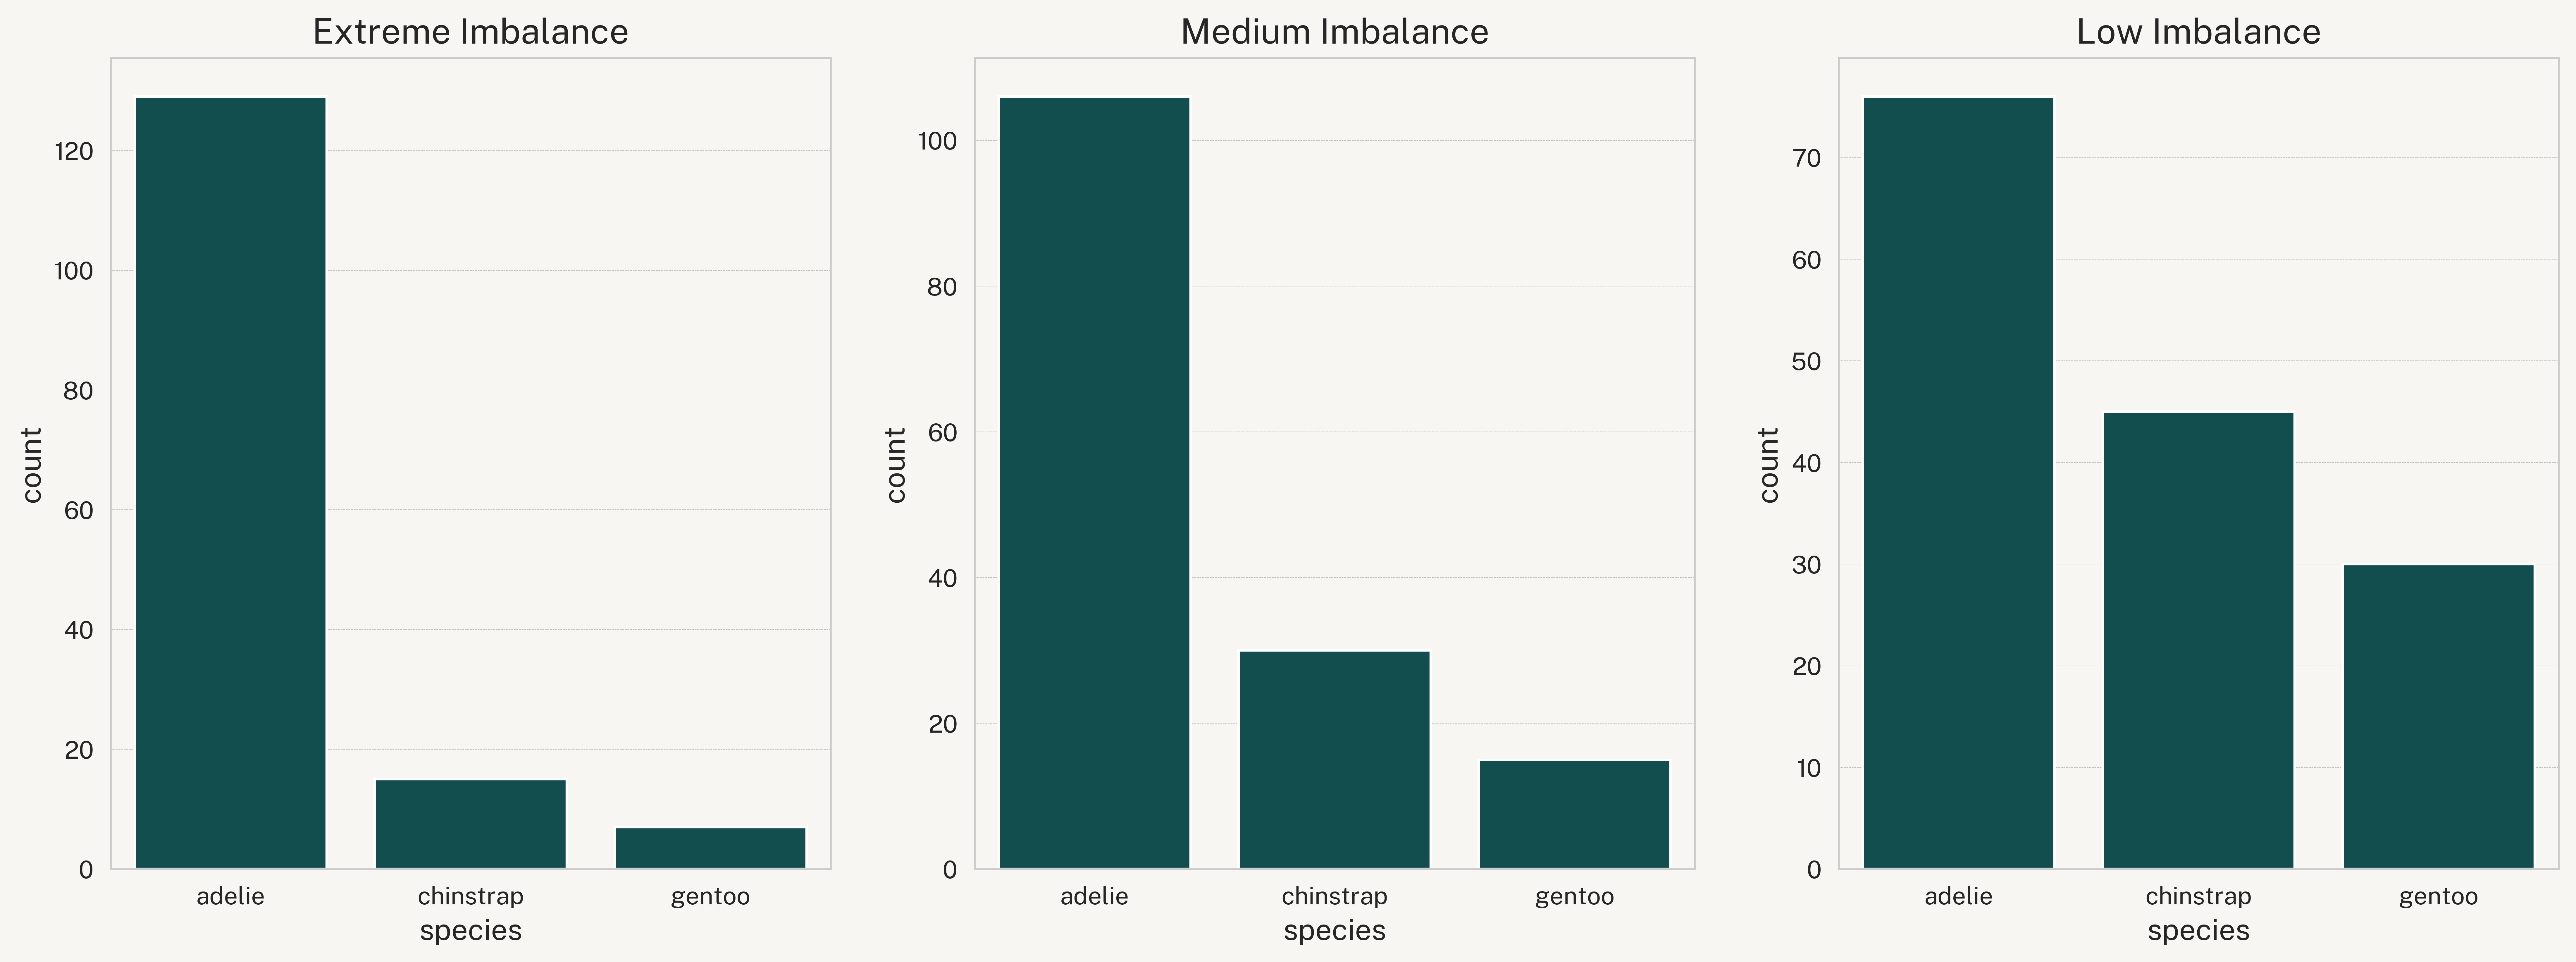

In [10]:
# load new datasets
extreme_dataset = pandas.read_csv("../datasets/palmer-penguins/penguins_extreme_imbalance.csv")
medium_dataset = pandas.read_csv("../datasets/palmer-penguins/penguins_medium_imbalance.csv")
low_dataset = pandas.read_csv("../datasets/palmer-penguins/penguins_low_imbalance.csv")

# plot dataset classes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
seaborn.countplot(x="species", data=extreme_dataset, ax=axes[0])
axes[0].set_title("Extreme Imbalance")
seaborn.countplot(x="species", data=medium_dataset, ax=axes[1])
axes[1].set_title("Medium Imbalance")
seaborn.countplot(x="species", data=low_dataset, ax=axes[2])
axes[2].set_title("Low Imbalance")
plt.show()